# Régression linéaire 
## Mini brief projet 
### 1. Chargement de données 

In [55]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
#description du dataset 
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Préparation des données
#### Transformation de dataframe

In [56]:
import numpy as np 
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# créer une colonne prix
df['MedHouseVal'] = dataset.target # code ici
# vérifier le nombre de valeurs nulles 
# code ici
df.isna().value_counts()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
False   False     False     False      False       False     False     False      False          20640
dtype: int64

#### base d'apprentissage et de test 

In [59]:
from sklearn.model_selection import train_test_split

X = dataset.data
y = df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)  # code ici 

### Exploration de données
Pour choisir les variables d'entrée (features) on procède à une étude de corrélation 

<AxesSubplot:>

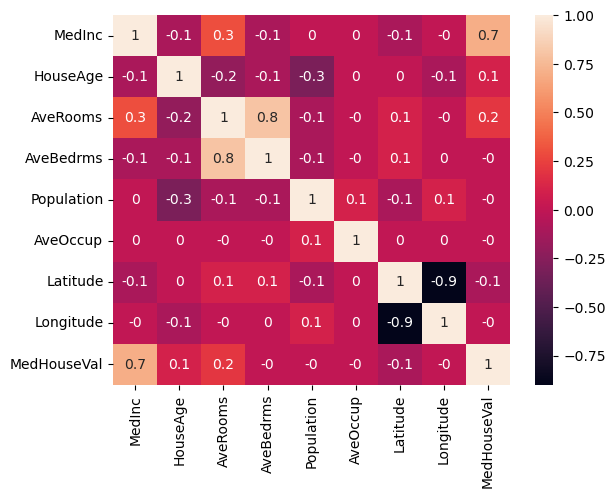

In [60]:
import seaborn as sns
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

<AxesSubplot:>

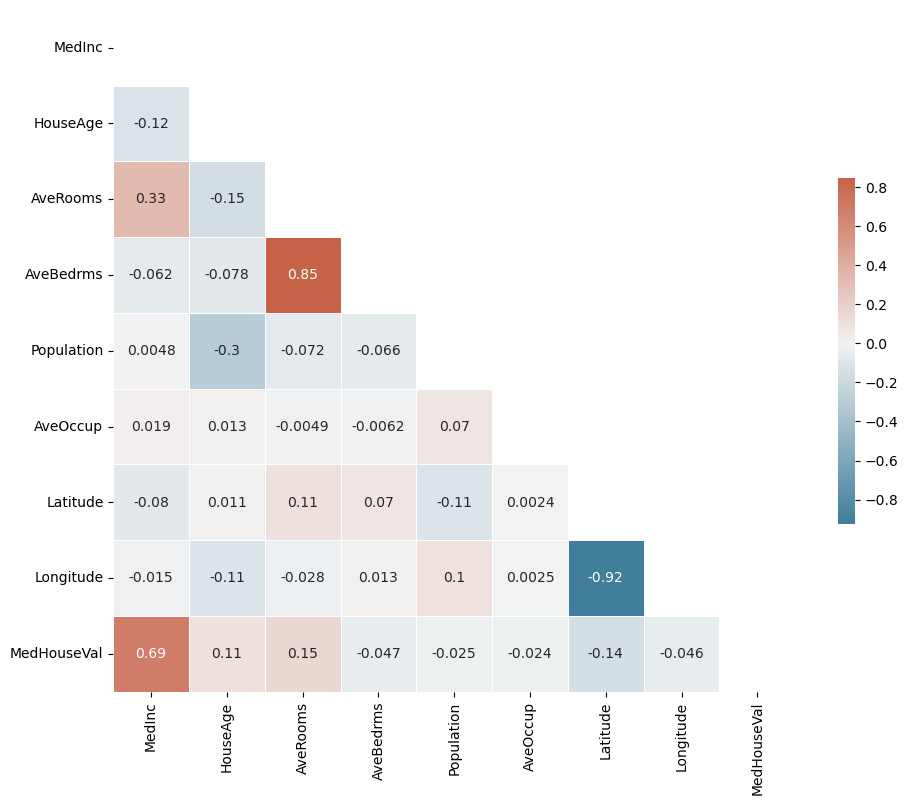

In [63]:
import matplotlib.pyplot as plt
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

In [ ]:
x_train = # code ici 
x_test = # code ici 

### Modèle de régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression() # code ici 
# train model 
lmodellineaire.fit(x_train, y_train)
# code ici 

LinearRegression()

### Evaluation du modèle 

In [79]:
# train evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_predict = lmodellineaire.predict(x_test) # code ici

# Calcul de l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_train_predict)
print("Erreur mae = {}".format(mae))

# Calcul de l'erreur quadratique moyenne (mse)
mse = mean_squared_error(y_test, y_train_predict)
print("Erreur mse = {}".format(mse))

# calcul de l'erreur rmse
rmse = mean_squared_error(y_test, y_train_predict, squared=False) # code ici 
print("Erreur rmse = {}".format(rmse))

#calcul de R²
r2 = r2_score(y_test, y_train_predict) # code ici 
print("R² = {}".format(r2))

Erreur mae = 0.5332001304956556
Erreur mse = 0.5558915986952443
Erreur rmse = 0.7455813830127763
R² = 0.5757877060324508


In [77]:
# test evaluate 

y_test_predict = lmodellineaire.predict(x_test)

# calcul de l'erreur 
rmse = sqrt(mean_squared_error(y_test, y_test_predict))# code ici 
print("Erreur rmse = {}".format(rmse))

#calcul de R²
r2 = r2_score(y_test, y_test_predict) # code ici 
print("R² = {}".format(r2))

Erreur rmse = 0.7455813830127763
R² = 0.5757877060324508


# Conclusion